In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [77]:
df = pd.read_csv('NIFTY 50_Data_Nov3_95_Mar9_2020.csv')

In [78]:
df.head()

,Date,Open,High,Low,Close
0,06 Mar 2020,10942.65,11035.10,10827.40,10989.45
1,05 Mar 2020,11306.05,11389.50,11244.60,11269.00
2,04 Mar 2020,11351.35,11356.60,11082.15,11251.00
3,03 Mar 2020,11217.55,11342.25,11152.55,11303.30
4,02 Mar 2020,11387.35,11433.00,11036.25,11132.75


In [79]:
df.drop(5811,axis=0,inplace=True)

In [80]:
cl = list(df['Close'])[::-1]
t = list(range(len(cl)))
dff = pd.DataFrame()
dff['X'] = t
dff['Y'] = cl

In [81]:
dff.head()

,X,Y
0,0,1000.00
1,1,988.92
2,2,978.22
3,3,964.01
4,4,953.07


In [82]:
def dydx(x,y):
    dy = [0]
    for i in range(len(x)-1):
        Dy = y[i+1] - y[i]
        Dx = x[i+1] - x[i]
        dy.append(Dy/Dx)
    return dy

In [83]:
dff['dydx'] = dydx(list(dff['X']),list(dff['Y']))

In [84]:
dff['d2ydx2'] = dydx(dff['X'],dff['dydx'])

In [87]:
dff['d3ydx3'] = dydx(dff['X'],dff['d2ydx2'])

In [88]:
#dff['ydydx'] = dff['Y']*dff['dydx']
#dff['xdydx'] = dff['X']*dff['dydx']


In [89]:
dff.head()

,X,Y,dydx,d2ydx2,d3ydx3
0,0,1000.00,0.00,0.00,0.00
1,1,988.92,-11.08,-11.08,-11.08
2,2,978.22,-10.70,0.38,11.46
3,3,964.01,-14.21,-3.51,-3.89
4,4,953.07,-10.94,3.27,6.78


In [160]:
def ma(y,t):
    m = []
    x = []
    for i in range(1,int(len(y)/t) + 1 ):
        yi = np.mean(y[(i-1)*t : i*(t)])
        m.append(yi)
        x.append((i-1)*t)
        #print(yi,i)
    return x,m

In [90]:
dff.corr()

,X,Y,dydx,d2ydx2,d3ydx3
X,1.000000,0.948567,0.014552,-0.000995,-0.000614
Y,0.948567,1.000000,0.021397,-0.002032,-0.001287
dydx,0.014552,0.021397,1.000000,0.682430,0.366272
d2ydx2,-0.000995,-0.002032,0.682430,1.000000,0.853756
d3ydx3,-0.000614,-0.001287,0.366272,0.853756,1.000000


In [91]:
dff.describe()

,X,Y,dydx,d2ydx2,d3ydx3
count,6059.000000,6059.000000,6059.000000,6059.000000,6059.000000
mean,3029.000000,4477.544247,1.648696,-0.046138,-0.049109
std,1749.226972,3355.182511,59.645280,81.246750,138.624346
min,0.000000,788.150000,-496.500000,-656.200000,-1229.500000
25%,1514.500000,1216.050000,-19.250000,-33.225000,-51.650000
50%,3029.000000,4092.250000,1.900000,-1.400000,-0.050000
75%,4543.500000,6264.200000,23.975000,28.200000,52.405000
max,6058.000000,12362.300000,651.500000,705.250000,993.900000


In [164]:
dn.corr()

,X,Y,dydx,d2ydx2,d3ydx3
X,1.000000,0.950595,0.236686,-0.022959,-0.031356
Y,0.950595,1.000000,0.288835,-0.048986,-0.067114
dydx,0.236686,0.288835,1.000000,0.620293,0.197952
d2ydx2,-0.022959,-0.048986,0.620293,1.000000,0.793567
d3ydx3,-0.031356,-0.067114,0.197952,0.793567,1.000000


In [165]:
dn.describe()

,X,Y,dydx,d2ydx2,d3ydx3
count,60.00000,60.000000,60.000000,60.000000,60.000000
mean,2950.00000,4403.391515,1.753209,-0.000161,-0.000016
std,1746.42492,3304.649318,4.596023,0.056889,0.000886
min,0.00000,874.311000,-12.414685,-0.190914,-0.002271
25%,1475.00000,1265.604375,-1.025054,-0.026953,-0.000283
50%,2950.00000,3853.738000,1.529642,0.001875,0.000053
75%,4425.00000,6038.486500,4.363100,0.027802,0.000378
max,5900.00000,11539.832500,12.892615,0.135134,0.002061


In [184]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

lin = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree = 3),
    LinearRegression()
)

In [185]:
x_train = dff[['X','dydx','d2ydx2']].iloc[4:]
y_train = dff['Y'].iloc[4:]

In [186]:
lin.fit(x_train,y_train)
mse = mean_squared_error(y_train, lin.predict(x_train))
rmse = np.sqrt(mse)
print(rmse)
print(lin[1].intercept_,lin[1].coef_)

1060.4610207185115
4479.852921552436 [3181.7608116    52.68375582  -39.54330212]


In [187]:
model.fit(x_train, y_train)
prediction = model.predict(x_train)

mse = mean_squared_error(y_train, model.predict(x_train))
rmse = np.sqrt(mse)
print(rmse)
print(model[2].coef_)

603.8593051565109
[ 0.00000000e+00  3.18819890e+03  9.49425844e+01 -8.37195823e+01
  1.00987155e+03 -2.48314282e+01  1.97214146e+01  6.86530817e+01
 -9.69640796e+01  6.94415352e+01  2.24616128e+00  9.94706749e+00
 -5.36618450e-01 -5.45776509e+01  8.09224539e+01 -6.20597394e+01
  1.48428872e+00 -5.12452510e+00 -5.34734376e-01  3.72733209e+00]


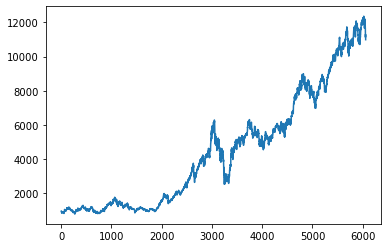

In [188]:
plt.plot(dff['X'].iloc[4:],y_train)

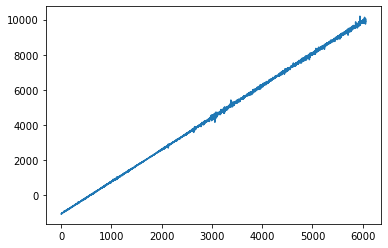

In [189]:
plt.plot(dff['X'].iloc[4:],lin.predict(x_train))

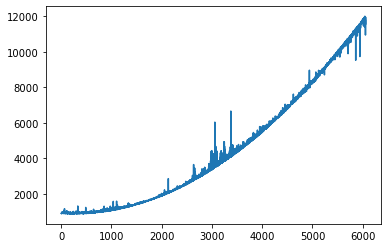

In [190]:
plt.plot(dff['X'].iloc[4:],model.predict(x_train))

In [310]:

lin = make_pipeline(
    StandardScaler(),
    LinearRegression()
)

model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree = 2),
    LinearRegression()
)


dn = pd.DataFrame()
x,y = ma(dff['Y'],30)

d = -50

dn['X'] = x[:d]
dn['Y'] = y[:d]
dn['dydx'] = dydx(list(dn['X']),list(dn['Y']))
dn['d2ydx2'] = dydx(list(dn['X']),list(dn['dydx']))
dn['d3ydx3'] = dydx(list(dn['X']),list(dn['d2ydx2']))

dt = pd.DataFrame()
dt['X'] = x[d:]
dt['Y'] = y[d:]
dt['dydx'] = dydx(list(dt['X']),list(dt['Y']))
dt['d2ydx2'] = dydx(list(dt['X']),list(dt['dydx']))
dt['d3ydx3'] = dydx(list(dt['X']),list(dt['d2ydx2']))

2637.868637283904 rmse linear
2839.348684326711 [1710.9213798   219.29853175 -170.42060988]
669.3648650322227 rmse poly
[   0.         1618.16569383  404.42718303 -323.13136113  501.22767014
 -108.50117079   83.15663125   61.85172032  -94.17343468  106.25688955]


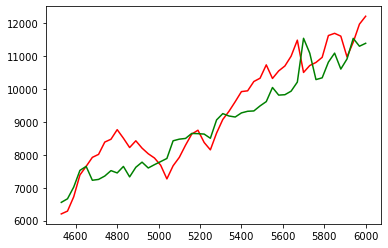

In [311]:
x_train = dn[['X','dydx','d2ydx2','d3ydx3']]
y_train = dn['Y']

x_test = dt[['X','dydx','d2ydx2','d3ydx3']]
y_test = dt['Y']


x_train = dn[['X','dydx','d2ydx2']]
y_train = dn['Y']

x_test = dt[['X','dydx','d2ydx2']]
y_test = dt['Y']


lin.fit(x_train,y_train)
mse = mean_squared_error(y_test, lin.predict(x_test))
rmse = np.sqrt(mse)
print(rmse,'rmse linear')
print(lin[1].intercept_,lin[1].coef_)


model.fit(x_train, y_train)
prediction = model.predict(x_test)

mse = mean_squared_error(y_test, model.predict(x_test))
rmse = np.sqrt(mse)
print(rmse,'rmse poly')
print(model[2].coef_)

plt.plot(dt['X'],dt['Y'],color='r')
plt.plot(dt['X'],model.predict(x_test),color='g')
#plt.plot(dn['X'],lin.predict(x_train),color='b')

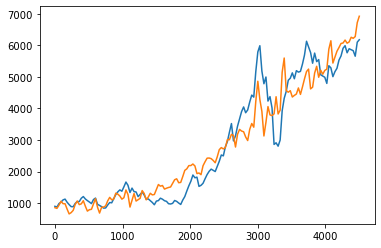

In [312]:
plt.plot(dn['X'],dn['Y'])
plt.plot(dn['X'],model.predict(x_train))

In [313]:
#plt.plot(dn['X'],dn['Y'])
#plt.plot(dn['X'],lin.predict(x_train))

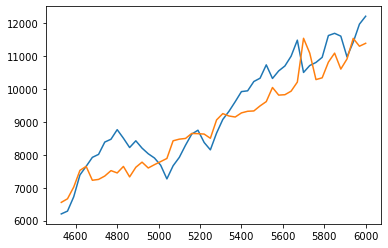

In [314]:
plt.plot(dt['X'],dt['Y'])
plt.plot(dt['X'],model.predict(x_test))

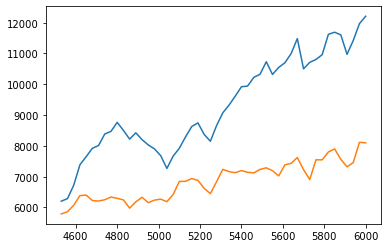

In [315]:
plt.plot(dt['X'],dt['Y'])
plt.plot(dt['X'],lin.predict(x_test))

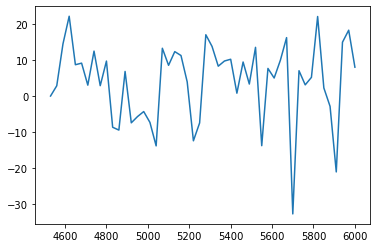

In [316]:
plt.plot(dt['X'],dt['dydx'])